In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

Experimentos del TP de Negocio por medio

En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.

    Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.
    En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.



Métodos

Los métodos evaluados en este notebook son los siguientes:

    FB: Fuerza Bruta.
    BT: Backtracking con podas por optimalidad y factibilidad.
    BT-F: Backtracking solamente con poda por factibilidad.
    BT-B: Backtracking solamente con poda por optimalidad.
    DP: Programación dinámica.



In [48]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados.head()

,dataset,n,M,metodo,tiempo
0,max-cant,1,1,PD,0.001839
1,max-cant,0,1,BT,0.001412
2,max-cant,2,1,PD,0.002357
3,max-cant,1,1,BT,0.001059
4,max-cant,3,3,PD,0.001970


# Experimentacion 1
complejidad fuerza bruta

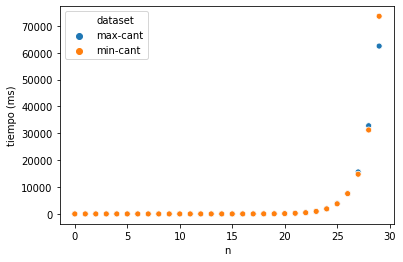

In [6]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo', hue='dataset');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-densidades.svg");

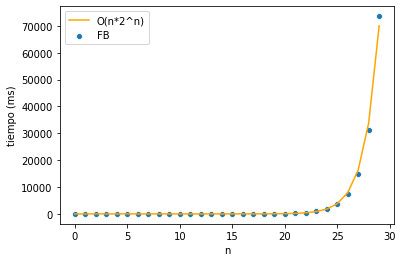

In [8]:
# Comparamos el dataset min-cant contra una función exponencial.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="min-cant")].copy();
df_complejidad_FB["tiempo_esperado"] = df_complejidad_FB["n"] * 2.0 ** df_complejidad_FB["n"]* 0.0000045; # Exponencial
fig = sns.scatterplot(data=df_complejidad_FB, x='n', y='tiempo');
fig = sns.lineplot(data=df_complejidad_FB, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n*2^n)','FB']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/fb-complejidad.svg")

Índice de correlación de Pearson: 0.99848979189


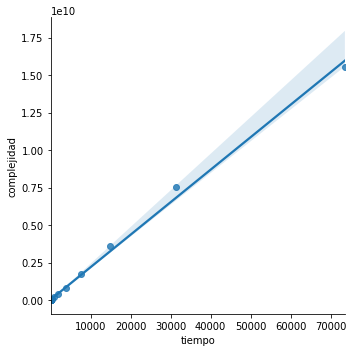

In [9]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="min-cant")].copy();
df_complejidad_FB["complejidad"] = df_complejidad_FB["n"] * 2.0 ** df_complejidad_FB["n"];
fig = sns.lmplot(data=df_complejidad_FB, x="tiempo", y="complejidad");
plt.savefig("graficos/fb-correlacion.jpeg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));

# Experimentacion 2:
complejidad de Backtracking

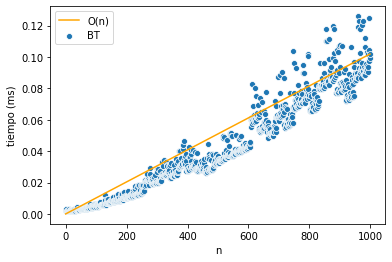

In [28]:
#mejor caso de bt
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "mejor-caso-bt")].copy();
df_BT_mejor_caso["tiempo_esperado"] = df_BT_mejor_caso["n"]* 0.000102; # Lineal
fig = sns.scatterplot(data=df_BT_mejor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_mejor_caso, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

Índice de correlación de Pearson: 0.963758927849


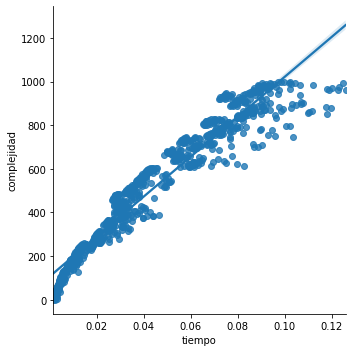

In [29]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "mejor-caso-bt")].copy();
df_BT_mejor_caso["complejidad"] = df_BT_mejor_caso["n"];
fig = sns.lmplot(data=df_BT_mejor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-mejor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_mejor_caso, "tiempo", "complejidad"));

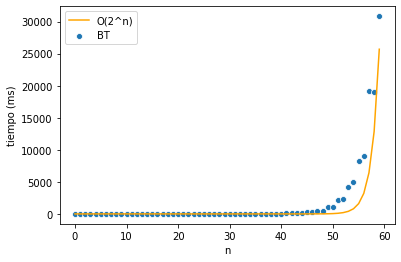

In [40]:
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-bt")].copy();
df_BT_peor_caso["tiempo_esperado"] = 2 ** df_BT_peor_caso["n"] * 0.00000000000004456; # Exponencial.
fig = sns.scatterplot(data=df_BT_peor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_peor_caso, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-peor-caso.svg");

Índice de correlación de Pearson: 0.937182460203


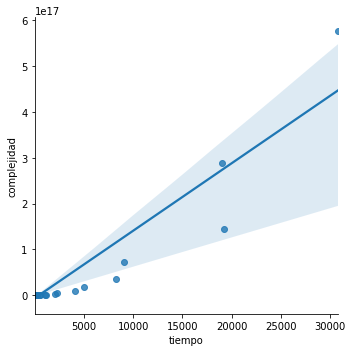

In [41]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "peor-caso-bt")].copy();
df_BT_peor_caso["complejidad"] = 2.0 ** df_BT_peor_caso["n"];
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-peor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso, "tiempo", "complejidad"));

# Experimentacion 3
podas de bt con max-cant y min-cant

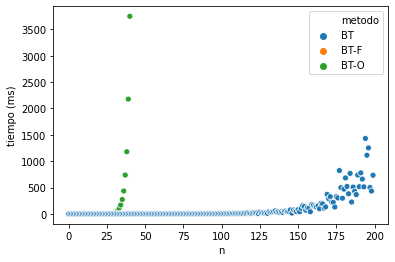

In [80]:
df_BT_min_cantidad = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "min-cant")].copy();
df_BT_min_cantidad = df_BT_min_cantidad[df_BT_min_cantidad["tiempo"] < 4000 ]; # Sacamos outliers.
fig = sns.scatterplot(data=df_BT_min_cantidad, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-alta.svg");
#en este BT-F anda re bien y BT-O anda muy mal, porq tenes mas casos en los que se pasa de m.

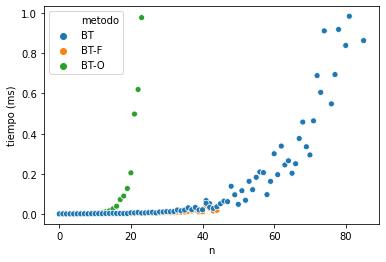

In [78]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-F.
fig = sns.scatterplot(data=df_BT_min_cantidad[df_BT_min_cantidad["tiempo"]<1], x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-alta-zoom.svg");

#bT-f anda mucho mejor porque poda bastante mas el arbol que con otras instancias

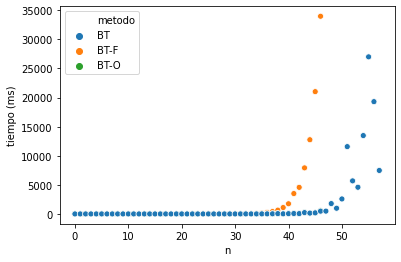

In [81]:

df_BT_max_cantidad = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O")) & (df_resultados["dataset"] == "max-cant")].copy();
fig = sns.scatterplot(data=df_BT_max_cantidad, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-baja.svg");

#ahora la poda de factibilidad anda muy mal

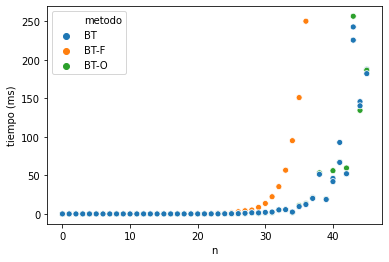

In [83]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
fig = sns.scatterplot(data=df_BT_max_cantidad[df_BT_max_cantidad["tiempo"]<400], x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-baja-zoom.svg");

# Experimentacion 4
complejidad de pogramacion dinamica

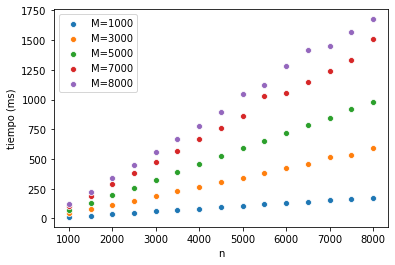

In [42]:
# Graficamos la evolución del tiempo de ejecución en función de n, con cortes en distintos M.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["M"]==1000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["M"]==3000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["M"]==5000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["M"]==7000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["M"]==8000], x='n', y='tiempo');
fig.legend(labels=['M=1000','M=3000','M=5000','M=7000', 'M=8000' ]);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n.svg");

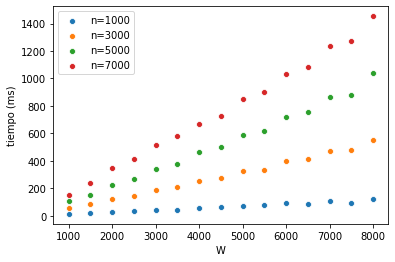

In [43]:
# Graficamos la evolución del tiempo de ejecución en función de M, con cortes en distintos n.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==1000], x='M', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==3000], x='M', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==5000], x='M', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==7000], x='M', y='tiempo');
fig.legend(labels=['n=1000','n=3000','n=5000','n=7000', 'n=8000']);
fig.set(xlabel='W', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-W.svg");

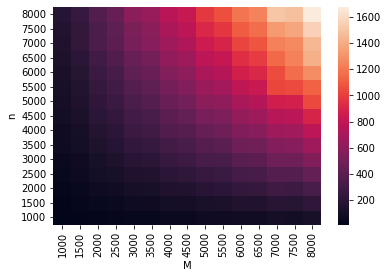

In [44]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamica")].copy();
df_heatmap = df_dinamica.pivot_table(index='n', columns='M', values='tiempo', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
plt.savefig("graficos/dp-heatmap.svg");

Índice de correlación de Pearson: 0.996944673625


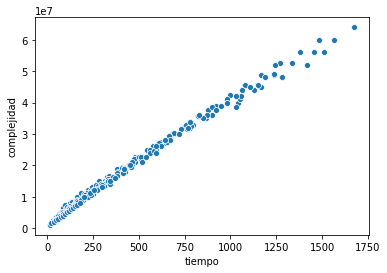

In [45]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamica")].copy();
df_dinamica["complejidad"] = df_dinamica["n"] * df_dinamica["M"];
fig = sns.scatterplot(data=df_dinamica, x="tiempo", y="complejidad");
plt.savefig("graficos/dp-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "tiempo", "complejidad"));

# Experimento 5

In [1]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_caso_particular = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="PD")) & (df_resultados["dataset"] == "dataset-5")].copy();
fig = sns.scatterplot(data=df_caso_particular, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/BT-caso-particular.svg");

NameError: name 'df_resultados' is not defined

# Experimentacion 6 : 
Programacion dinamica vs backtracking
corremos los dataset donde en la solucion entran el mayor numero de locales y el dataset que entran el menor numero de locales, con respecto a M.

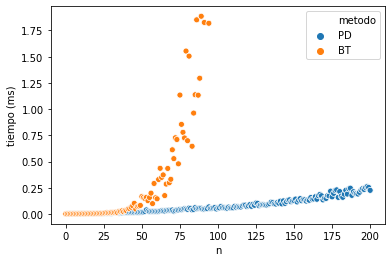

In [53]:
df_min_cantidad = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="PD")) & (df_resultados["dataset"] == "min-cant")].copy();
df_min_cantidad = df_min_cantidad[df_min_cantidad["tiempo"]<=2];
fig = sns.scatterplot(data=df_min_cantidad, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-alta.svg");

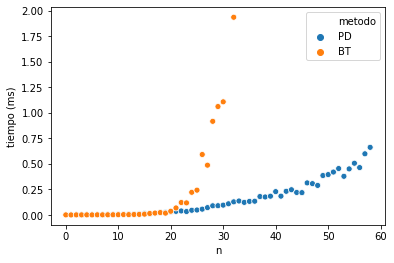

In [52]:
df_max_cantidad = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="PD")) & (df_resultados["dataset"] == "max-cant")].copy();
df_max_cantidad = df_max_cantidad[df_max_cantidad["tiempo"]<=2];
fig = sns.scatterplot(data=df_max_cantidad, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-baja.svg");